In [135]:
using Plots, LaTeXStrings

# Constants and Parameters
d = 2.0   # Boundary between the two materials
z_max = 20.0   # Total simulation length
c1 = 4.0  # Speed of sound in material 1
c2 = 9.0  # Speed of sound in material 2
dt = 0.001  # Time step
dz = 0.01  # Space step
total_time = 10.0  # Total simulation time
num_steps = Int(total_time / dt)
k = 0.5

# Initial condition function
function source_term(z, t, d, t0)
    if z < d
        return sin(pi * z / d) * (1 + tanh((t - t0) / 0.5))
    else
        return 0.0
    end
end

# Discretize the domain
z_values = 0:dz:z_max
u = zeros(length(z_values))
u_old = copy(u)
u_new = copy(u)

# Matrix to store the displacement over time
u_matrix = zeros(length(z_values), num_steps)

# Finite difference update
function update_wave_equation!(u, u_old, c1, c2, dz, dt, d, t)
    n = length(u)
    bnd_index = Int(d / dz)

    for i in 2:bnd_index-1
        u_new[i] = 2 * u[i] - u_old[i] + (c1 * dt / dz)^2 * (u[i-1] - 2 * u[i] + u[i+1]) + source_term(z_values[i], t, d, 1.0)
    end

    for i in bnd_index:n-1
        u_new[i] = 2 * u[i] - u_old[i] + (c2 * dt / dz)^2 * (u[i-1] - 2 * u[i] + u[i+1]) + source_term(z_values[i], t, d, 1.0)

    end

    u_new[bnd_index] += k * (u[bnd_index+1] - u[bnd_index])


    u_old .= u
    u .= u_new
end

# Time-stepping loop
for t_idx in 1:num_steps
    t = t_idx * dt
    update_wave_equation!(u, u_old, c1, c2, dz, dt, d, t)
    u_matrix[:, t_idx] = u
end


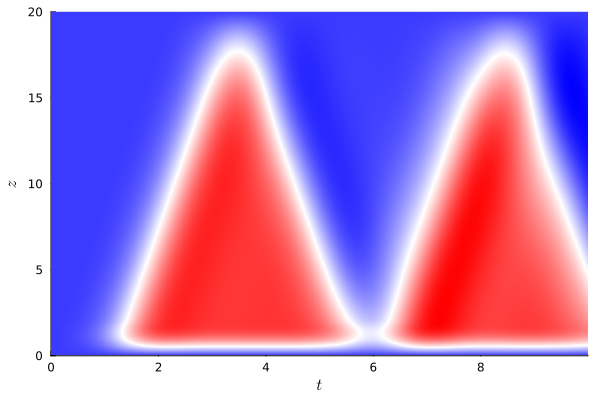

In [136]:
# Plot solution on heatmap, in the best way possible

colormap = cgrad([:blue, :white, :red])
heatmap(0:dt:total_time-dt, z_values, u_matrix, xlabel=L"t", ylabel=L"z", colorbar=false, c=colormap)